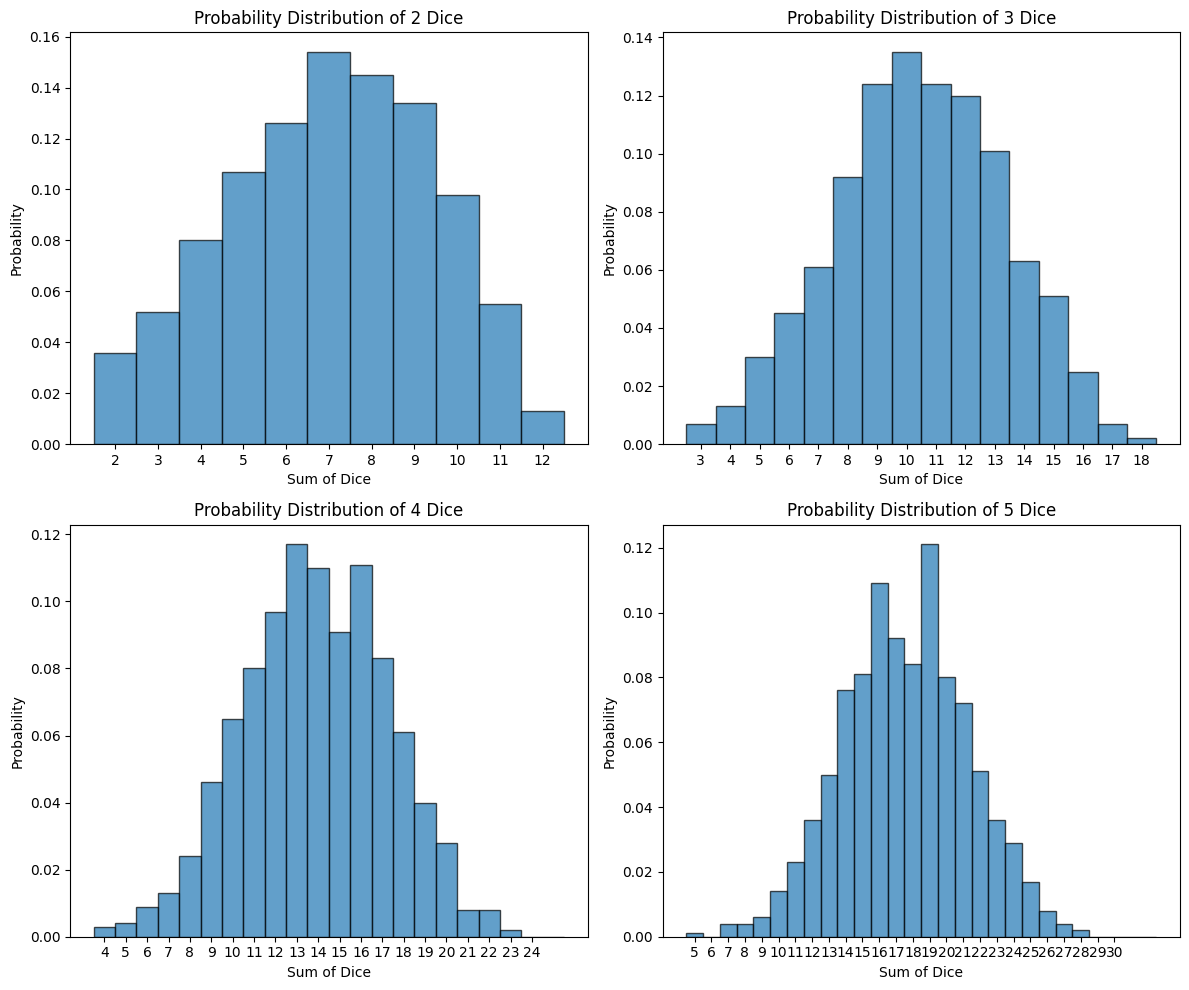

In [13]:
# 重新定義變數並繪製 4 個機率分布圖
import numpy as np
import matplotlib.pyplot as plt

# 模擬 1000 次擲骰子，每次擲不同數量的骰子
dice1 = np.random.randint(1, 7, size=1000)
dice2 = np.random.randint(1, 7, size=1000)
dice3 = np.random.randint(1, 7, size=1000)
dice4 = np.random.randint(1, 7, size=1000)
dice5 = np.random.randint(1, 7, size=1000)

# 計算不同骰子數量的總和
dices_2 = dice1 + dice2
dices_3 = dice1 + dice2 + dice3
dices_4 = dice1 + dice2 + dice3 + dice4
dices_5 = dice1 + dice2 + dice3 + dice4 + dice5

# 創建 2x2 子圖
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 設定 bins 以對齊離散值
bins_2 = np.arange(2, 14) - 0.5
bins_3 = np.arange(3, 20) - 0.5
bins_4 = np.arange(4, 27) - 0.5
bins_5 = np.arange(5, 34) - 0.5

# 繪製每個骰子數量的機率分布圖
axes[0, 0].hist(dices_2, bins=bins_2, density=True, edgecolor='black', alpha=0.7)
axes[0, 0].set_xticks(range(2, 13))
axes[0, 0].set_title("Probability Distribution of 2 Dice")
axes[0, 0].set_xlabel("Sum of Dice")
axes[0, 0].set_ylabel("Probability")

axes[0, 1].hist(dices_3, bins=bins_3, density=True, edgecolor='black', alpha=0.7)
axes[0, 1].set_xticks(range(3, 19))
axes[0, 1].set_title("Probability Distribution of 3 Dice")
axes[0, 1].set_xlabel("Sum of Dice")
axes[0, 1].set_ylabel("Probability")

axes[1, 0].hist(dices_4, bins=bins_4, density=True, edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(4, 25))
axes[1, 0].set_title("Probability Distribution of 4 Dice")
axes[1, 0].set_xlabel("Sum of Dice")
axes[1, 0].set_ylabel("Probability")

axes[1, 1].hist(dices_5, bins=bins_5, density=True, edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(5, 31))
axes[1, 1].set_title("Probability Distribution of 5 Dice")
axes[1, 1].set_xlabel("Sum of Dice")
axes[1, 1].set_ylabel("Probability")

# 調整佈局
plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import random

def kruskal_experiment(deck_size=52, face_card_step=5, trials=10000):
    """Simulates Kruskal's Count experiment with a given deck size and face card step."""
    # Define card values
    card_values = {str(i): i for i in range(2, 11)}  # Number cards 2-10
    card_values.update({'J': face_card_step, 'Q': face_card_step, 'K': face_card_step, 'A': 1})  # Face cards & A

    success_count = 0

    for _ in range(trials):
        # Create and shuffle the deck
        deck = ([str(i) for i in range(2, 11)] + ['J', 'Q', 'K', 'A'] * 4) * (deck_size // 52)
        random.shuffle(deck)

        # Track final positions for first 10 start points
        final_positions = []
        for start in range(10):
            index = start
            while index < len(deck):
                step = card_values[deck[index]]
                index += step
                if index >= len(deck):  # Stop at final card
                    final_positions.append(deck[index - step])
                    break

        # Check if all 10 positions reach the same final card
        if len(set(final_positions)) == 1:
            success_count += 1

    print(success_count / trials)

kruskal_experiment(deck_size=52, face_card_step=5)


0.1625


insight:
with more steps available(more cards or less steps for JQK), the probability of reaching the same end card will be bigger, which is intuitive, cuz the more steps we take, the more chance we'll get into the same card.And once getting into the same card, the end card will definitely be the same!!

In [13]:
kruskal_experiment(52,1)
kruskal_experiment(52,3)
kruskal_experiment(52,5)
kruskal_experiment(52,7)
kruskal_experiment(52,9)

0.7724
0.4334
0.166
0.0544
0.0194


In [14]:
kruskal_experiment(104,1)
kruskal_experiment(104,3)
kruskal_experiment(104,5)
kruskal_experiment(104,7)
kruskal_experiment(104,9)

0.9927
0.9026
0.6512
0.4128
0.2186
